# Лабараторая работа № 1

## Описание датасета

**предметная область**: описание подержанных автомобилей выставленных на продажу

**источник датасета**: [https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv)

**характер данных**: реальный

**атрибуты**:

**Make**: Хранит в себе название производителя автомабиля, тип: строковый. Характеристика высокой важности //

**Model**: Хранит в себе название модели автомабиля, тип: строковый. Характеристика среденей важности /

**Price**: Хранит в себе цену на данных автомабиль, тип: int64. Характеристика высокой важности

**Year**: Хранит в себе год выпуска автомобиля, тип: int64. Характеристика высокой важности

**Kilometer**: Хранит в себе пробег автомобиля, тип: int64. Характеристика высокой важности

**Fuel Type**: Хранит в себе название топлива автомобиля, тип: строковый. Характеристика высокой важности

**Transmission**: Хранит в тип коробки предач автомабиля, тип: строковый. Характеристика высокой важности

**Location**: Хранит в себе местоположение автомабиля, тип: строковый. Характеристика среденей важности

**Color**: Хранит в себе цвет автомабиля, тип: строковый. Характеристика низкой важности

**Owner**: Хранит в количество владельцев автомабиля, тип: строковый. Характеристика средней важности

**Seller Type**: Хранит в себе тип продавца автомабиля(коменрческий/частник), тип: строковый. Характеристика средней важности

**Drivetrain**: Хранит в себе тип трансмисии автомабиля, строковый. Характеристика средней важности

**Length**: Хранит в себе длину автомабиля, тип: int64. Характеристика средней важности

**Width**: Хранит в себе ширину автомабиля, тип: int64. Характеристика средней важности

**Height**: Хранит в себе высоту автомабиля, тип: int64. Характеристика средней важности

**Seating Capacity**: Хранит в себе количество посадочных мест в автомабиле, тип: int64. Характеристика низкой важности 

**Fuel Tank Capacity**: Хранит в себе вместительность топливного бака автомабиль, . Характеристика средней важности

In [78]:
!pip install matplotlib.

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme()

Описания задачи анализа нет.

Пример данных

In [221]:
df1 = pd.read_csv('car details v4.csv')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2059 non-null   int64  
 1   Make                2059 non-null   object 
 2   Model               2059 non-null   object 
 3   Price               2059 non-null   int64  
 4   Year                2059 non-null   int64  
 5   Kilometer           2059 non-null   int64  
 6   Fuel Type           2059 non-null   object 
 7   Transmission        2059 non-null   object 
 8   Location            2059 non-null   object 
 9   Color               2059 non-null   object 
 10  Owner               2059 non-null   object 
 11  Seller Type         2059 non-null   object 
 12  Drivetrain          1923 non-null   object 
 13  Length              1995 non-null   float64
 14  Width               1995 non-null   float64
 15  Height              1995 non-null   float64
 16  Seatin

,Unnamed: 0,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD,4735.0,1830.0,1795.0,7.0,55.0


## Анализ для числовых данных

In [222]:
def std_dev(column, name):
    print(name)
    print('Средняя: ' + str(column.mean()))
    print('СКО: ' + str(np.std(column)))

def histogram(column, name, y_title, is_log_scale):
    print('Гистрограмма')
    # plt.figure(figsize=(10, 5))
    # plt.hist(df['Age'], bins=30);
    # plt.grid(True)
    # plt.title('Age distribution');
    ax = sns.histplot(column, edgecolor='w', bins=30, log_scale=is_log_scale)

    #вычисляем первый квартиль, третий, межквартальный размах, на основе их - верхнюю и нижнюю границу, если вышел из диапозона - выброс
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1;
    upper_boundary = Q3 + (1.5 * IQR);
    lower_boundary = Q1 - (1.5 * IQR);

    outliers = column[(column > upper_boundary) | (column < lower_boundary)]

    #указываем на первый возможный выброс (только на один, иначе будет лишнее награмождение)
    #for index in range(0, len(outliers)):
    if not outliers.empty:
        plt.annotate(
            'Первый возможный выброс', 
            xy=(outliers.iloc[0], 0.5), 
            xytext=(outliers.iloc[0] + 10, 100), 
            fontsize=12,
            arrowprops=dict(arrowstyle='->', ec='grey', lw=2),
            bbox=dict(boxstyle="round", fc="0.8")
        )
    
    # plt.xticks(fontsize=14)
    # plt.yticks(fontsize=14)
    plt.xlabel(name, fontsize=14)
    plt.ylabel(y_title, fontsize=14)
    plt.title(name, fontsize=20);
    
def atribut_statistic(column, name, y_title = 'Количество', is_log_scale = False):
    std_dev(column, name)
    histogram(column, name, y_title, is_log_scale)
    print('Количесво пропущенных значений: ' + str(column.isnull().sum()))

Цена
Средняя: 1702991.6964545897
СКО: 2419292.9291388267
Гистрограмма
Количесво пропущенных значений: 0


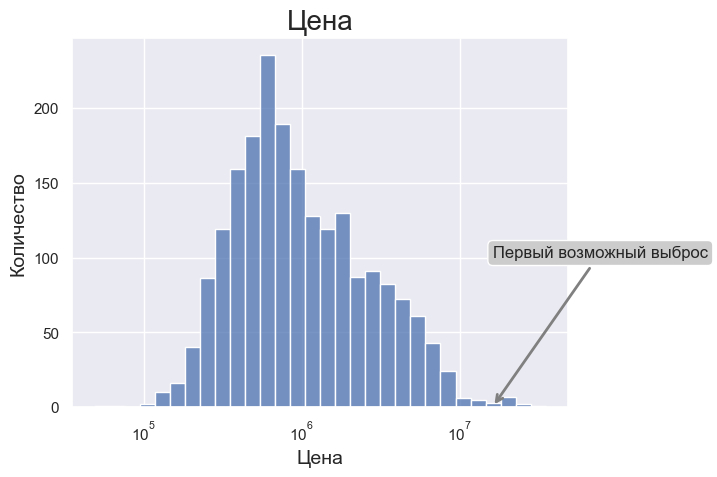

In [223]:
atribut_statistic(df1['Price'], 'Цена', 'Количество', True)

Год
Средняя: 2016.4254492472073
СКО: 3.3627466903227354
Гистрограмма
Количесво пропущенных значений: 0


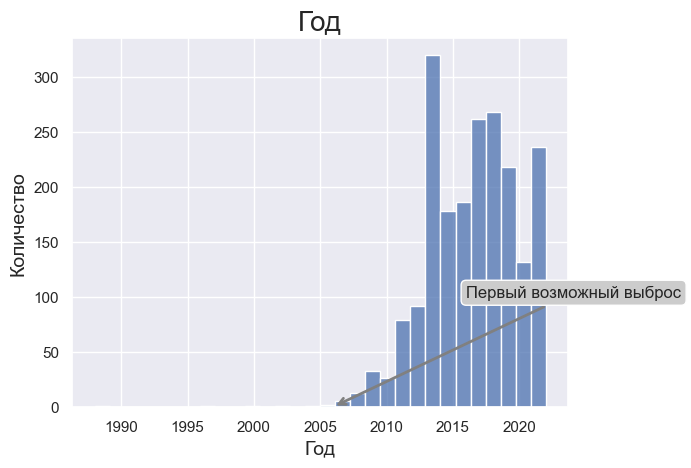

In [214]:
atribut_statistic(df1['Year'], 'Год')

Пробег
Средняя: 54224.714424477905
СКО: 57347.79011283419
Гистрограмма
Количесво пропущенных значений: 0


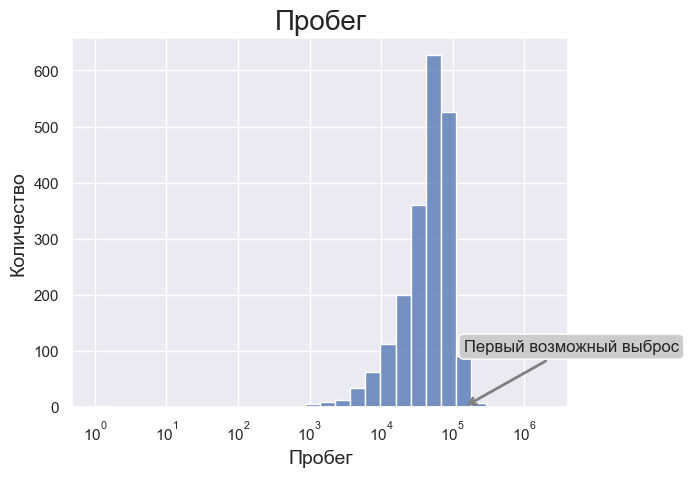

In [215]:
atribut_statistic(df1['Kilometer'], 'Пробег', is_log_scale=True)

Длина
Средняя: 4280.860651629073
СКО: 442.3476010231136
Гистрограмма
Количесво пропущенных значений: 64


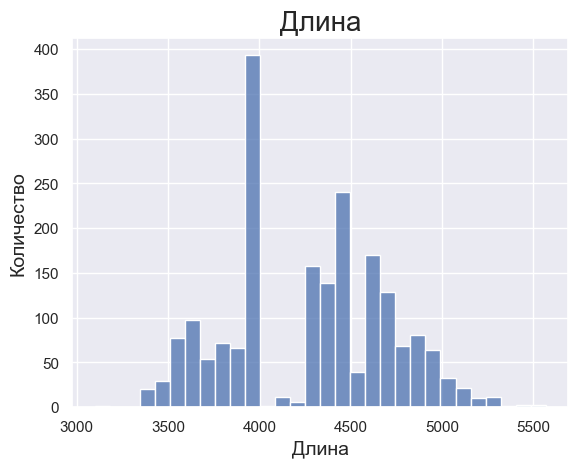

In [216]:
atribut_statistic(df1['Length'], 'Длина')

У данного атрибута пропущена 64 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

Ширина
Средняя: 1767.9919799498746
СКО: 135.2319197383884
Гистрограмма
Количесво пропущенных значений: 64


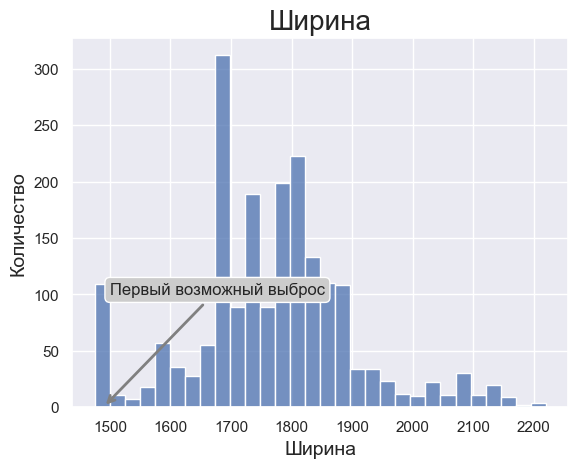

In [217]:
atribut_statistic(df1['Width'], 'Ширина')

У данного атрибута пропущена 64 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

Высота
Средняя: 1591.7353383458646
СКО: 136.03984794867296
Гистрограмма
Количесво пропущенных значений: 64


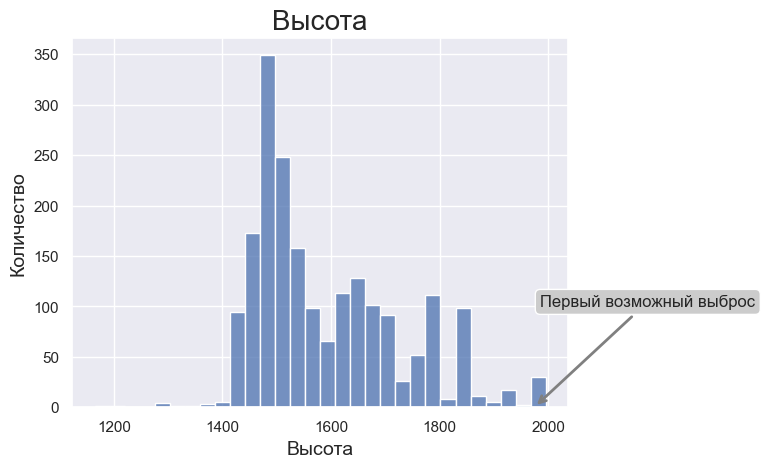

In [218]:
atribut_statistic(df1['Height'], 'Высота')

У данного атрибута пропущена 64 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

Количество мест
Средняя: 5.306265664160401
СКО: 0.8219640514363336
Гистрограмма
Количесво пропущенных значений: 64


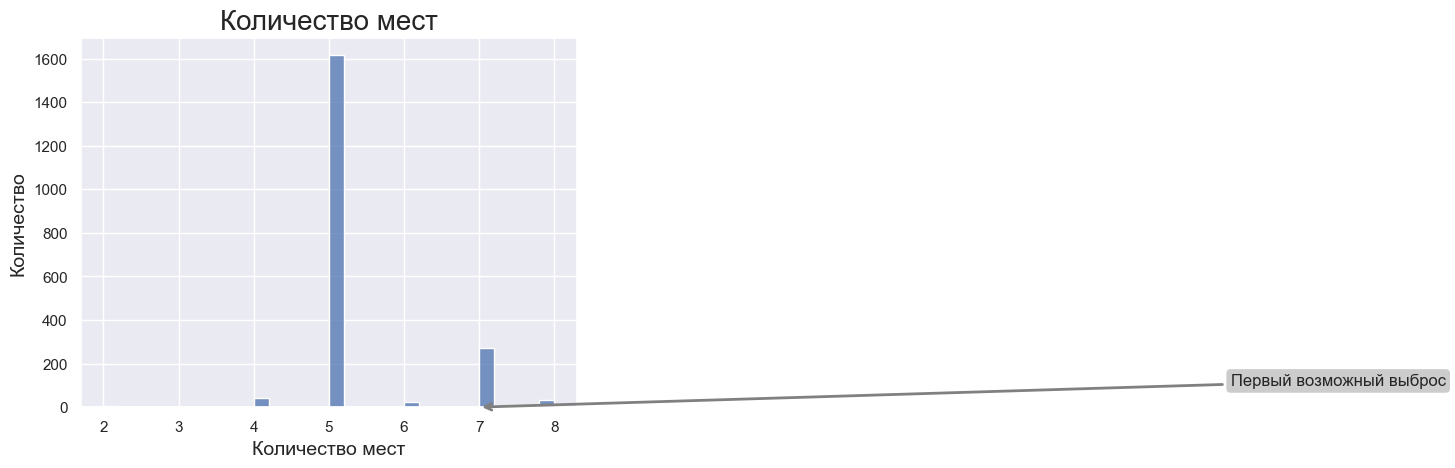

In [219]:
atribut_statistic(df1['Seating Capacity'], 'Количество мест')

У данного атрибута пропущена 64 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

Емкость топливного бака
Средняя: 52.00220966084276
СКО: 15.10631492168366
Гистрограмма
Количесво пропущенных значений: 113


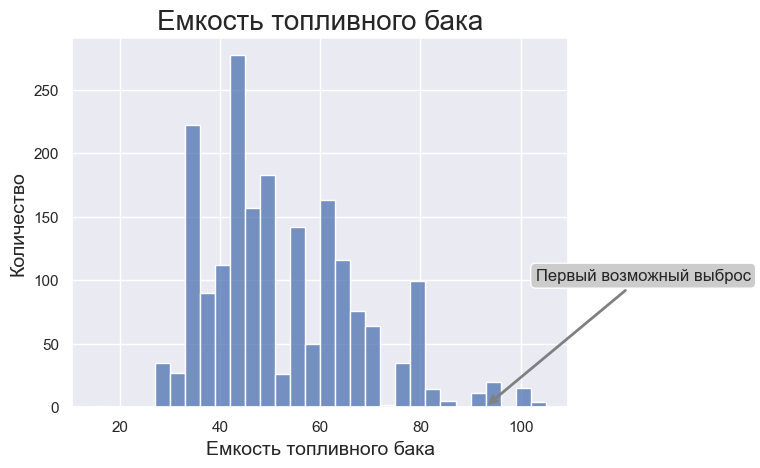

In [220]:
atribut_statistic(df1['Fuel Tank Capacity'], 'Емкость топливного бака')

У данного атрибута пропущена 113 элемента, исходя из того, что количество элементво в датасете = 2059. Данные строки - можно просто исключить

## Анализ для текстовых данных

Посколько обработка текстовых данных скуднее, чем числовых - выведем процентное содержание самых популярных значений для каждой из колонок

In [299]:
def text_atribut_statistic(column, name, pd):
    print(f'Атрибут: {name}')
    statistic = column.value_counts(normalize=True) * 100
    if (statistic.size > 3):
        with_name = statistic.head(3)
        other = pd.Series({'другие': 100 - with_name.sum()})
        statistic = pd.concat([with_name, other])
    result = statistic.round(2).astype(str) + '%'
    print(result)

In [303]:
text_atribut_statistic(df1['Make'], 'Марка', pd)

Атрибут: Марка
Maruti Suzuki    21.37%
Hyundai          16.95%
Mercedes-Benz     8.31%
другие           53.38%
dtype: object


In [271]:
def unique_count(column, name):
    print(f'У атрибута {name} - {column.unique().size} уникальных значений')

In [302]:
unique_count(df1['Model'], 'Модель')

У атрибута Модель - 1050 уникальных значений


In [301]:
text_atribut_statistic(df1['Fuel Type'], 'Топливо', pd)

Атрибут: Топливо
Diesel    50.95%
Petrol    45.75%
CNG        2.43%
другие     0.87%
dtype: object


In [304]:
text_atribut_statistic(df1['Transmission'], 'Коробка передач', pd)

Атрибут: Коробка передач
Transmission
Manual       55.03%
Automatic    44.97%
Name: proportion, dtype: object


In [305]:
text_atribut_statistic(df1['Location'], 'Местоположение', pd)

Атрибут: Местоположение
Mumbai    16.61%
Delhi     14.91%
Pune       6.99%
другие    61.49%
dtype: object


In [306]:
text_atribut_statistic(df1['Color'], 'Цвет', pd)

Атрибут: Цвет
White     38.95%
Silver    13.84%
Grey      10.68%
другие    36.52%
dtype: object


In [308]:
text_atribut_statistic(df1['Seller Type'], 'Количество владельцев', pd)

Атрибут: Количество владельцев
Seller Type
Individual                 96.99%
Corporate                   2.77%
Commercial Registration     0.24%
Name: proportion, dtype: object


In [310]:
text_atribut_statistic(df1['Owner'], 'Какой по счёту продавец', pd)

Атрибут: Какой по счёту продавец
First     78.63%
Second    18.12%
Third      2.04%
другие     1.21%
dtype: object


In [311]:
text_atribut_statistic(df1['Drivetrain'], 'Трансмиссия', pd)

Атрибут: Трансмиссия
Drivetrain
FWD    69.16%
RWD    16.69%
AWD    14.14%
Name: proportion, dtype: object


## Определим корреляцию между параметрами

Поскольку в моём датасете есть как числовые, так и строковые столбцы, то от строковых нужно избавиться. Так же нужно избавиться от числового столбца, который в себе хранит индексы элементов датасета. 

In [321]:
only_numbers_df = df1.select_dtypes(include=['float64', 'int64'])
only_numbers_df = only_numbers_df.drop(columns=['Unnamed: 0'])

Расчитаем матрицу корреляции между всеми числовыми атрибутами

In [322]:
correlation_m = only_numbers_df.corr()
print(correlation_m)

                       Price      Year  Kilometer    Length     Width  \
Price               1.000000  0.311400  -0.150825  0.556741  0.563996   
Year                0.311400  1.000000  -0.296547  0.098770  0.195493   
Kilometer          -0.150825 -0.296547   1.000000  0.047705  0.017462   
Length              0.556741  0.098770   0.047705  1.000000  0.807054   
Width               0.563996  0.195493   0.017462  0.807054  1.000000   
Height              0.075080  0.116102   0.093592  0.185451  0.296702   
Seating Capacity   -0.038524 -0.006366   0.125244  0.295149  0.221689   
Fuel Tank Capacity  0.584631  0.064512   0.055975  0.813010  0.793868   

                      Height  Seating Capacity  Fuel Tank Capacity  
Price               0.075080         -0.038524            0.584631  
Year                0.116102         -0.006366            0.064512  
Kilometer           0.093592          0.125244            0.055975  
Length              0.185451          0.295149            0.813010

Отметем, что число 1.0 находится только на диагонали, а значит по этому признаку - мы может отличить кореляцию атрибута с самим собой

Поскольку в тз не было установлено контрольного числа, после которого значения станут высококоррелированными, то пусть таким рубежём станет 0.75

In [334]:
frontier = 0.60
large_correlation = correlation_m[(abs(correlation_m) > frontier) & (correlation_m != 1.0)]
print("Все высококоррелированные атрибуты:")
print(large_correlation.dropna(how='all', axis=0).dropna(how='all', axis=1))

Все высококоррелированные атрибуты:
                      Length     Width    Height  Seating Capacity  \
Length                   NaN  0.807054       NaN               NaN   
Width               0.807054       NaN       NaN               NaN   
Height                   NaN       NaN       NaN          0.695761   
Seating Capacity         NaN       NaN  0.695761               NaN   
Fuel Tank Capacity  0.813010  0.793868       NaN               NaN   

                    Fuel Tank Capacity  
Length                        0.813010  
Width                         0.793868  
Height                             NaN  
Seating Capacity                   NaN  
Fuel Tank Capacity                 NaN  


Характер корреляции - положительный для все высоко корреляционных атрибутов

Аналогично определим границу некоррелированности атрибутов

In [336]:
frontier = 0.1
large_correlation = correlation_m[(abs(correlation_m) < frontier)]
print("Все некоррелированные атрибуты:")
print(large_correlation.dropna(how='all', axis=0).dropna(how='all', axis=1))

Все некоррелированные атрибуты:
                       Price      Year  Kilometer    Length     Width  \
Price                    NaN       NaN        NaN       NaN       NaN   
Year                     NaN       NaN        NaN  0.098770       NaN   
Kilometer                NaN       NaN        NaN  0.047705  0.017462   
Length                   NaN  0.098770   0.047705       NaN       NaN   
Width                    NaN       NaN   0.017462       NaN       NaN   
Height              0.075080       NaN   0.093592       NaN       NaN   
Seating Capacity   -0.038524 -0.006366        NaN       NaN       NaN   
Fuel Tank Capacity       NaN  0.064512   0.055975       NaN       NaN   

                      Height  Seating Capacity  Fuel Tank Capacity  
Price               0.075080         -0.038524                 NaN  
Year                     NaN         -0.006366            0.064512  
Kilometer           0.093592               NaN            0.055975  
Length                   NaN      

Построим матрицы рассеивания матрицу графиков рассеивания для всех числовых атрибутов

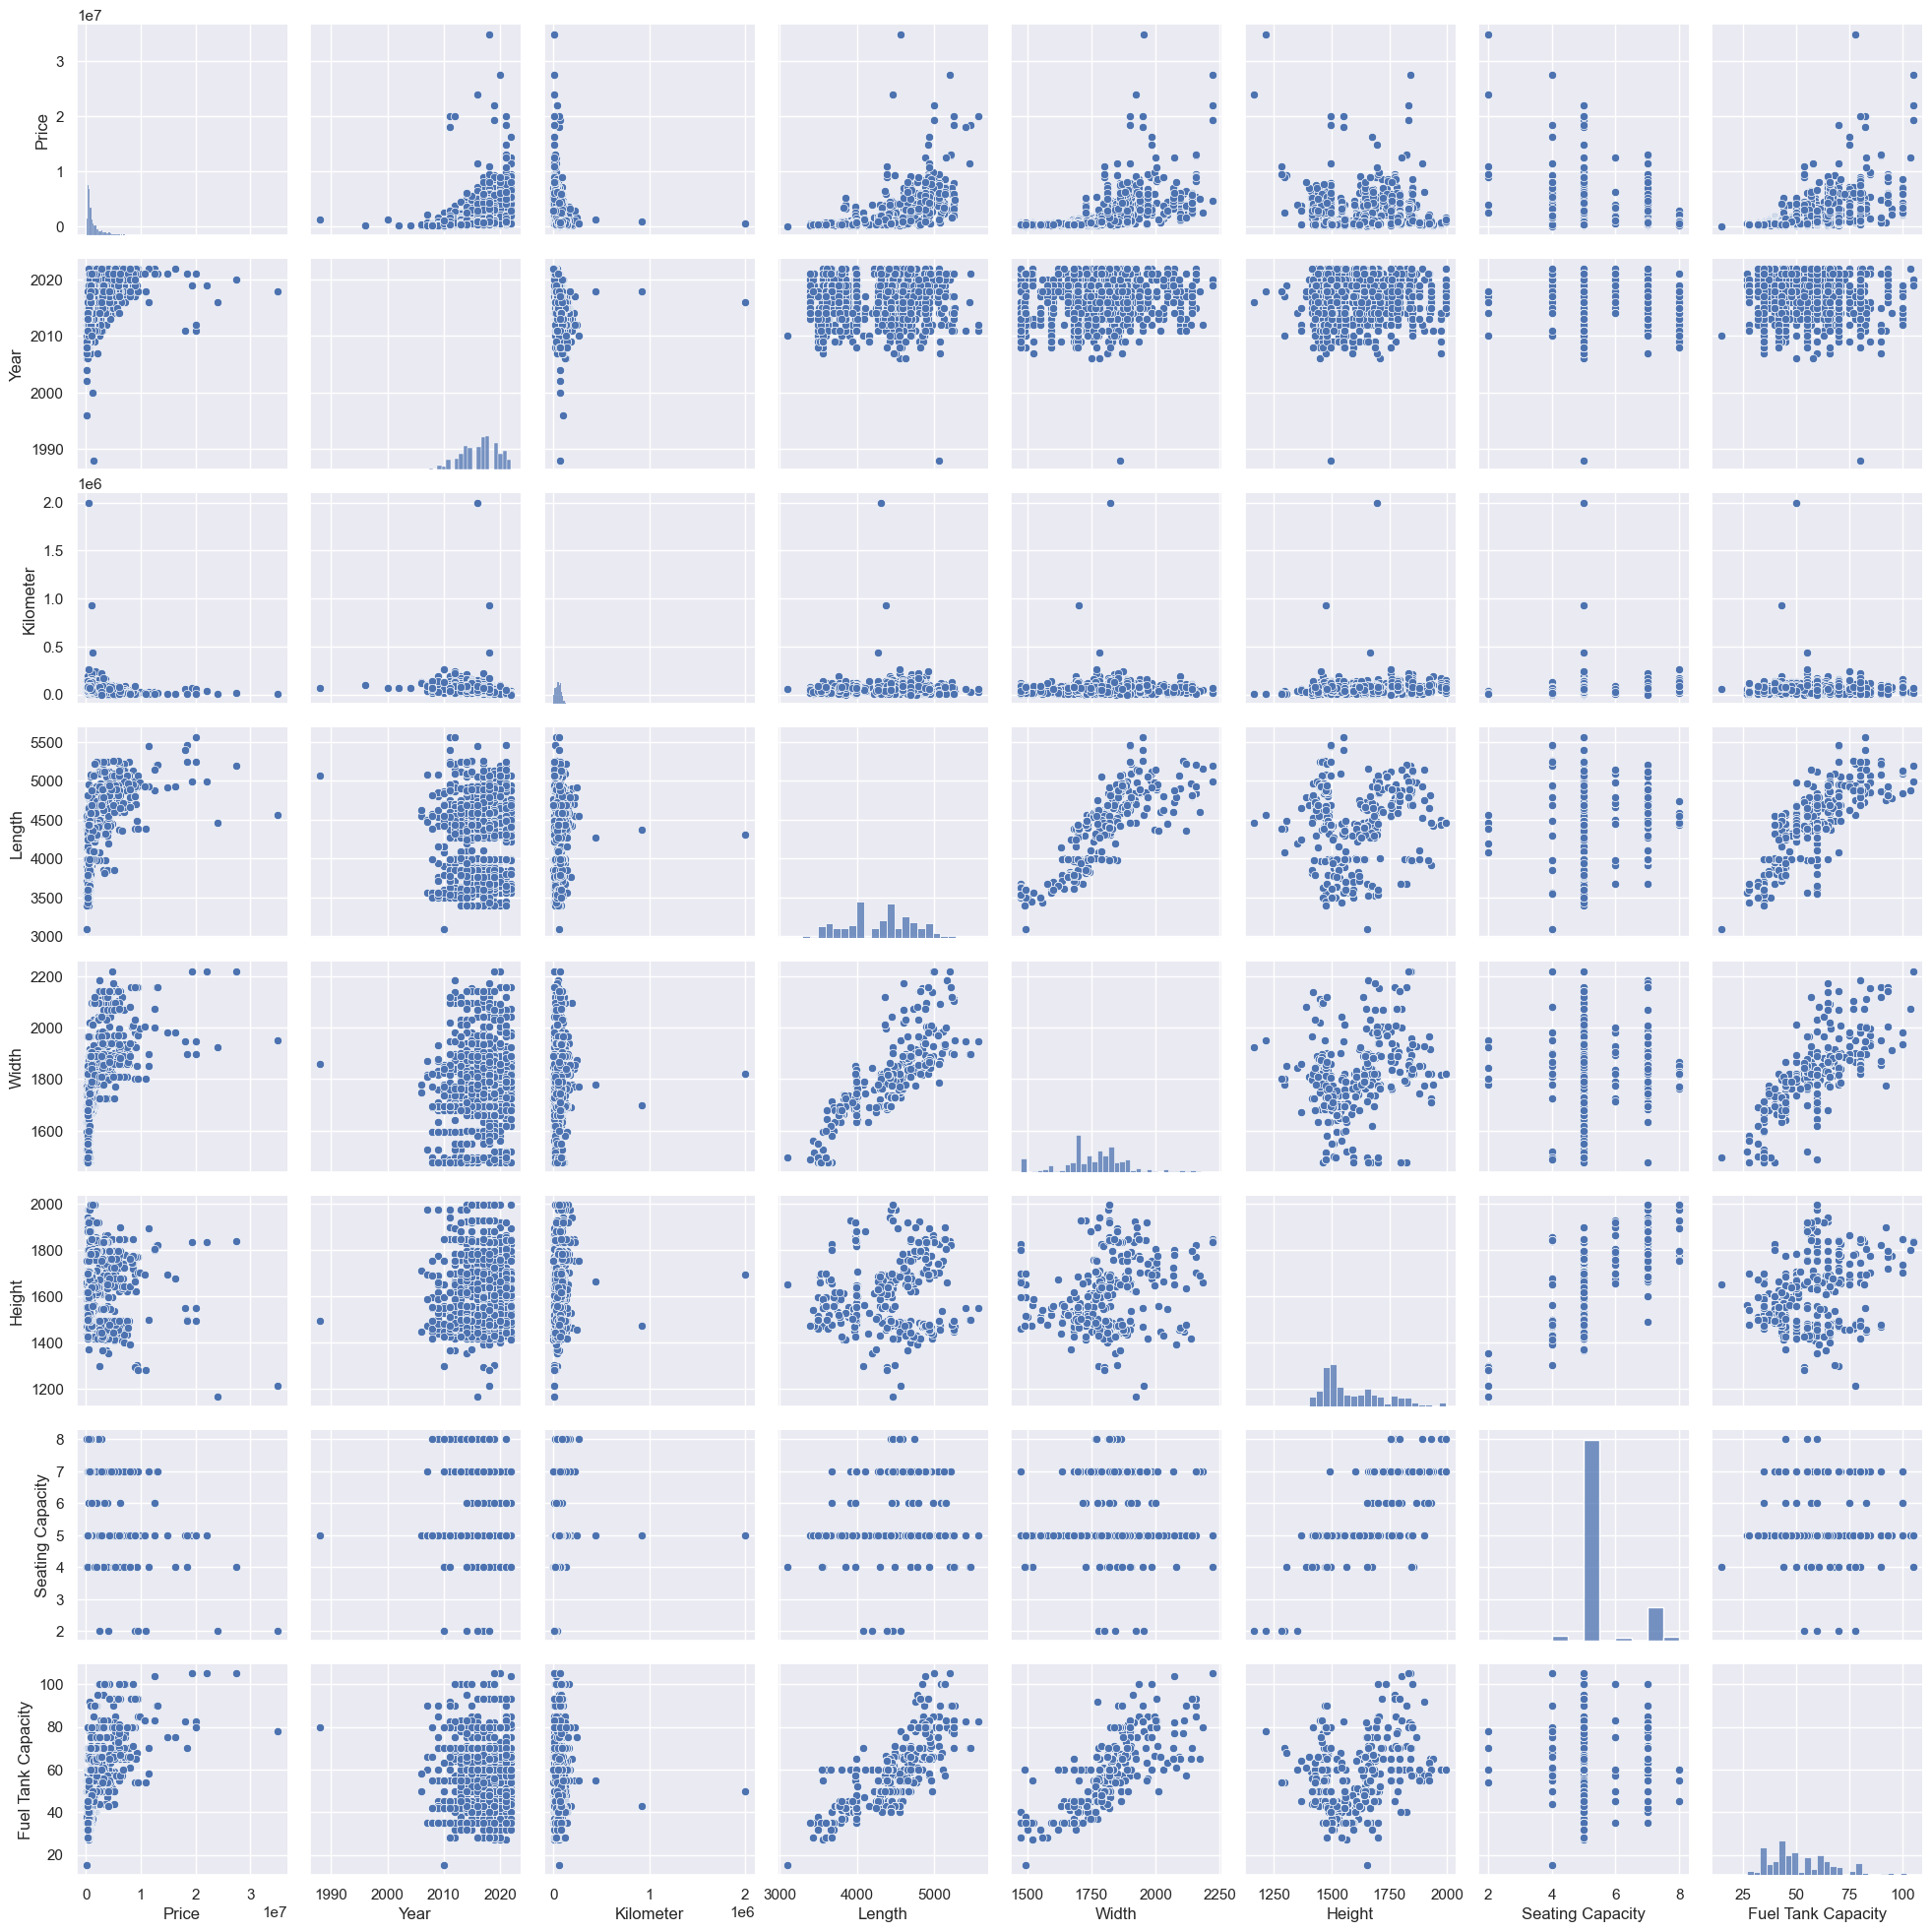

In [338]:
sns.pairplot(only_numbers_df)
plt.show()

## Анализ полученных результатов

**Из графиков и матрици корреляции видно, что высококоррелированные атрибуты все имеют прямую зависомость.** 

Большей дине соответствует большая вместительность топлевного бака и большая ширена. 

Большей ширине соответствует большая вместительность топлевного бака;

Большей высоте соответствует большее количество мест (ого, странно, что не большей длинне)

**Так же можно заметить, что между собой не связаны**:

Цена и высота, количество мест.

Год и длина, количество мест и вместительность бака

Пробег и длинна, ширина, высота и вместительность бака(удивительно)